<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_modeling_Korea_20221203_6~11_Ver_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [3]:
import pandas as pd
df = pd.read_csv('19592021korea.csv')
df

,year,mon,amo,aao,ao,emi,gmo,nino3,nino4,pdo,pna,qbo,freq,inten
0,1959,1,-0.006,-4368.947,-11420.598,0.812,-0.138,-0.046,0.014,1.266,-0.973,-27.747,0,0
1,1959,2,0.015,5669.410,23909.777,0.455,-0.160,-0.050,-0.230,0.711,-0.870,-26.219,0,0
2,1959,3,-0.081,4402.402,10543.838,0.300,-0.081,-0.117,-0.331,0.204,0.654,-20.962,0,0
3,1959,4,-0.106,26736.894,862.876,0.430,-0.108,-0.104,-0.184,0.301,-0.349,-11.294,0,0
4,1959,5,-0.146,15129.227,-1731.295,0.471,-0.153,-0.362,-0.241,0.313,-0.602,4.960,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021,8,0.170,-1268.185,766.893,-0.376,0.348,-0.421,-0.241,-0.832,-0.014,-10.350,1,26
752,2021,9,0.261,-16800.218,-650.241,-0.435,0.404,-0.410,-0.469,-1.794,-0.074,-13.822,1,55
753,2021,10,0.291,-11055.364,262.031,-0.570,0.431,-0.707,-0.631,-2.565,-0.313,-17.170,0,0
754,2021,11,0.276,-21354.890,930.126,-0.466,0.397,-0.942,-0.600,-2.215,0.650,-19.507,0,0


1. 학습(Train, test) 데이터셋 (756개)  : X Feature(11개), Y Feature(2개)

2. 변수는 'YEAR' 를 제외한  'MON', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3', 'NINO4', 'PDO', 'PNA', 'QBO', 총 11개를 기준

3. 한국은 1870년부터 자료가 있으나 결과값이 1959년부터로 1959 ~ 2021까지의 데이터를 기준으로 전처리함

4. 모델링 
 - 1. 한국데이터만 사용
 - 2. 테스트는 2021년 기준

칼럼별 명칭

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df.columns

Index(['year', 'mon', 'amo', 'aao', 'ao', 'emi', 'gmo', 'nino3', 'nino4',
       'pdo', 'pna', 'qbo', 'freq', 'inten'],
      dtype='object')

In [6]:
df['freq'].describe()

count    756.000000
mean       0.230159
std        0.582245
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: freq, dtype: float64

In [7]:
df['inten'].describe()

count    756.000000
mean      10.341270
std       24.244067
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      120.000000
Name: inten, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    756 non-null    int64  
 1   mon     756 non-null    int64  
 2   amo     756 non-null    float64
 3   aao     756 non-null    float64
 4   ao      756 non-null    float64
 5   emi     756 non-null    float64
 6   gmo     756 non-null    float64
 7   nino3   756 non-null    float64
 8   nino4   756 non-null    float64
 9   pdo     756 non-null    float64
 10  pna     756 non-null    float64
 11  qbo     756 non-null    float64
 12  freq    756 non-null    int64  
 13  inten   756 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 82.8 KB


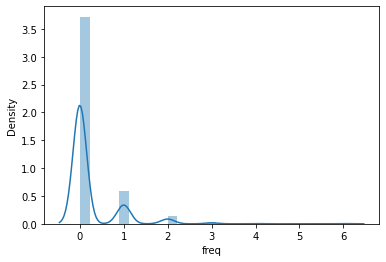

In [9]:
sns.distplot(df['freq'])

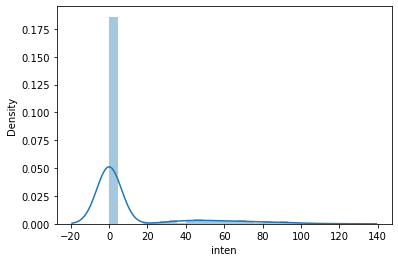

In [10]:
sns.distplot(df['inten'])

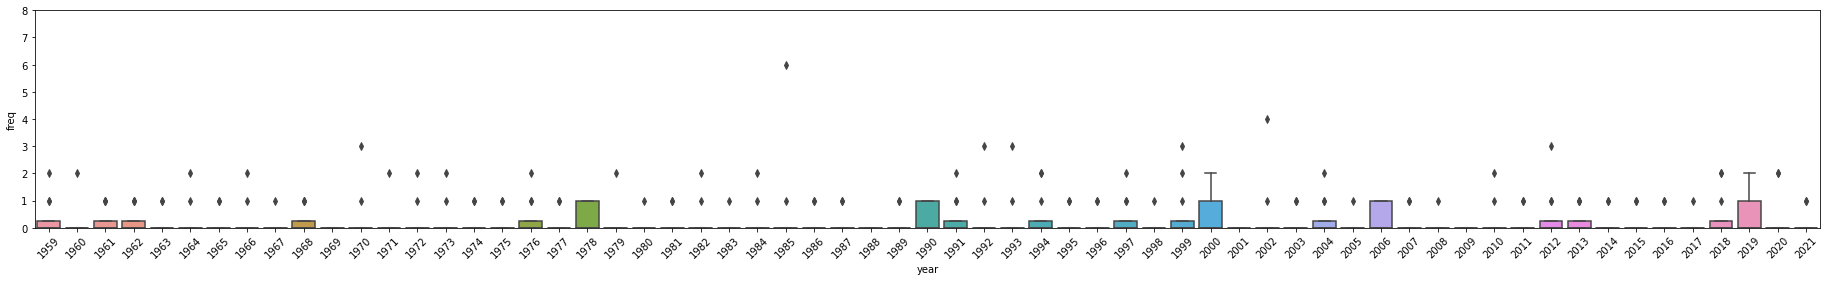

In [11]:
var = 'year'
data = pd.concat([df['freq'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(32, 4))
fig = sns.boxplot(x=var, y="freq", data=data)
fig.axis(ymin=0, ymax=8);
plt.xticks(rotation=45);


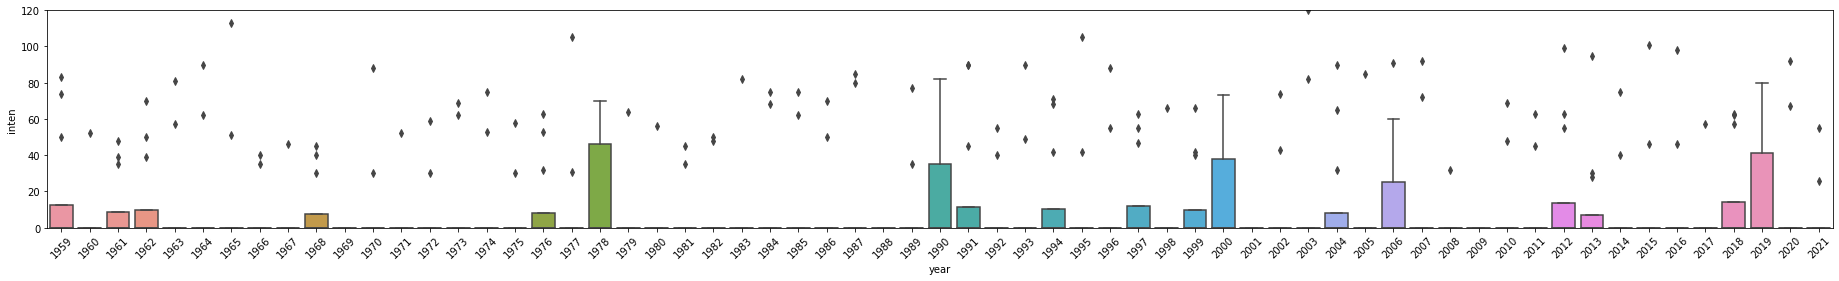

In [12]:
var = 'year'
data = pd.concat([df['inten'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(32, 4))
fig = sns.boxplot(x=var, y="inten", data=data)
fig.axis(ymin=0, ymax=120);
plt.xticks(rotation=45);

# Data Splitting


In [13]:
df = df[df["mon"].isin([6,7,8,9,10,11])]

In [14]:
train = df[df["year"].isin(list(range(1959,2014,1)))]
train

,year,mon,amo,aao,ao,emi,gmo,nino3,nino4,pdo,pna,qbo,freq,inten
5,1959,6,-0.083,2899.151,-623.744,0.275,-0.138,-0.507,-0.434,0.306,-0.096,15.227,0,0
6,1959,7,-0.130,4616.751,2605.754,0.100,-0.153,-0.786,-0.594,-0.011,0.081,19.241,1,50
7,1959,8,-0.022,19427.269,-3600.671,0.335,-0.172,-0.790,-0.504,0.050,-1.743,18.082,1,83
8,1959,9,0.028,-9673.271,-1280.071,0.208,-0.244,-0.666,-0.530,-0.126,-0.583,19.050,2,74
9,1959,10,-0.055,6261.660,-1149.088,0.143,-0.184,-0.414,-0.429,1.107,0.277,21.443,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2013,7,0.063,-13125.939,742.789,0.145,0.111,-0.665,-0.215,-1.131,0.211,25.441,0,0
655,2013,8,0.065,11294.890,1330.301,0.130,0.193,-0.616,-0.157,-1.189,0.167,23.671,1,30
656,2013,9,0.150,19588.922,-3508.145,0.021,0.266,-0.326,-0.105,-0.628,0.116,21.955,0,0
657,2013,10,0.270,2850.287,2629.953,0.185,0.204,-0.202,-0.045,-1.090,-0.143,19.818,1,95


In [15]:
test = df[df["year"].isin([2015,2016,2017,2018,2019,2020,2021])]
test

,year,mon,amo,aao,ao,emi,gmo,nino3,nino4,pdo,pna,qbo,freq,inten
677,2015,6,-0.301,-4881.335,2117.451,0.081,0.241,1.334,0.832,0.613,0.389,15.380,0,0
678,2015,7,-0.298,-19013.072,-7180.162,0.093,0.219,1.714,0.791,1.142,0.185,22.278,1,46
679,2015,8,-0.218,-11149.100,-4162.624,0.257,0.307,1.930,0.883,0.897,-0.426,23.283,1,101
680,2015,9,-0.070,7617.823,-1593.603,0.080,0.338,2.324,0.953,1.048,-0.554,23.171,0,0
681,2015,10,-0.149,8278.162,-2399.029,0.210,0.462,2.443,0.977,0.856,1.299,22.111,0,0
682,2015,11,-0.265,-8587.062,15358.227,0.357,0.418,2.636,1.315,0.140,-0.451,19.873,0,0
689,2016,6,-0.027,-29226.408,2066.744,-0.154,0.299,-0.011,0.382,0.612,-0.438,17.134,0,0
690,2016,7,0.014,-61.726,1450.235,-0.256,0.356,-0.461,0.165,0.379,-0.507,22.093,0,0
691,2016,8,0.157,11831.443,3957.715,-0.385,0.398,-0.414,-0.024,-0.148,0.308,23.762,0,0
692,2016,9,0.088,-25293.612,6389.186,-0.619,0.369,-0.186,-0.201,-0.474,-0.182,23.507,1,46


In [16]:
x = train.iloc[:,1:12]
y1 = train.iloc[:,12:13]
y2 = train.iloc[:,13:]
y1, y2

(     freq
 5       0
 6       1
 7       1
 8       2
 9       0
 ..    ...
 654     0
 655     1
 656     0
 657     1
 658     0
 
 [330 rows x 1 columns],      inten
 5        0
 6       50
 7       83
 8       74
 9        0
 ..     ...
 654      0
 655     30
 656      0
 657     95
 658      0
 
 [330 rows x 1 columns])

In [17]:
X = test.iloc[:,1:12]
Y1 = test.iloc[:,12:13]
Y2 = test.iloc[:,13:]
Y1, Y2

(     freq
 677     0
 678     1
 679     1
 680     0
 681     0
 682     0
 689     0
 690     0
 691     0
 692     1
 693     1
 694     0
 701     0
 702     1
 703     0
 704     0
 705     0
 706     0
 713     0
 714     2
 715     2
 716     0
 717     1
 718     0
 725     0
 726     1
 727     2
 728     2
 729     1
 730     0
 737     0
 738     0
 739     2
 740     2
 741     0
 742     0
 749     0
 750     0
 751     1
 752     1
 753     0
 754     0,      inten
 677      0
 678     46
 679    101
 680      0
 681      0
 682      0
 689      0
 690      0
 691      0
 692     46
 693     98
 694      0
 701      0
 702     57
 703      0
 704      0
 705      0
 706      0
 713      0
 714     57
 715     62
 716      0
 717     63
 718      0
 725      0
 726     40
 727     54
 728     80
 729     45
 730      0
 737      0
 738      0
 739     67
 740     92
 741      0
 742      0
 749      0
 750      0
 751     26
 752     55
 753      0
 754      0)

#Modelling


In [18]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [19]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x.values, y1, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [20]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

## Elastic Net Regression :
again made robust to outliers

In [21]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

## Kernel Ridge Regression :


In [22]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


## Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [23]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

## XGBoost :

In [24]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

## LightGBM :

In [25]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# Scores : Base model

In [26]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.7459 (0.1228)



In [27]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.7461 (0.1228)



In [28]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.7694 (0.0858)



In [29]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.7225 (0.1216)



In [30]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.7185 (0.1012)



In [31]:
core = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.7185 (0.1012)



## Stacking averaged Models Class

In [32]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [33]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.7137 (0.1197)



In [34]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR))

score = rmsle_cv(averaged_models)
print("Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Averaged models score: 0.7088 (0.1173)


In [35]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [36]:
averaged_models.fit(x, y1)
av_train_pred = averaged_models.predict(X)
print(rmsle(Y1, av_train_pred))

0.7098716051264861


In [37]:
model_xgb.fit(x, y1)
xgb_train_pred = model_xgb.predict(X)
print(rmsle(Y1, xgb_train_pred))

0.6705469350072691


In [38]:
model_lgb.fit(x, y1)
lgb_train_pred = model_lgb.predict(X)
print(rmsle(Y1, lgb_train_pred))

0.6482126320487424


In [39]:
xgb_train_pred

array([ 0.83442616,  1.1682924 ,  1.0079159 ,  0.34194416,  0.08145279,
        0.41238707,  0.42766392,  0.5885949 ,  0.5633592 , -0.05872875,
        0.16827032,  0.25814092,  0.31147623, -0.04117745,  0.19831166,
        0.03149739, -0.04447073, -0.07249248,  0.67171216,  0.68546647,
        0.71752375,  0.13805887,  0.3623324 ,  0.18405035,  0.19411126,
        1.1136107 ,  0.6507272 ,  0.9474439 ,  0.18780306,  0.46699673,
       -0.17238116,  0.7820288 ,  0.70051265,  0.45069006, -0.16417414,
       -0.06424773, -0.19399005,  0.08607975,  0.5008315 ,  0.1685088 ,
       -0.12362504,  0.09569469], dtype=float32)

In [ ]:
test["Name"] = test["year"].apply(str) + ' ' + test["mon"].apply(str)
test

In [41]:
Y1 = Y1.set_index(test["Name"])

In [42]:
lgb_train_pred = pd.DataFrame(lgb_train_pred)
lgb_train_pred = lgb_train_pred.set_index(test["Name"])

In [43]:
# Y1 = Y1.values.tolist()

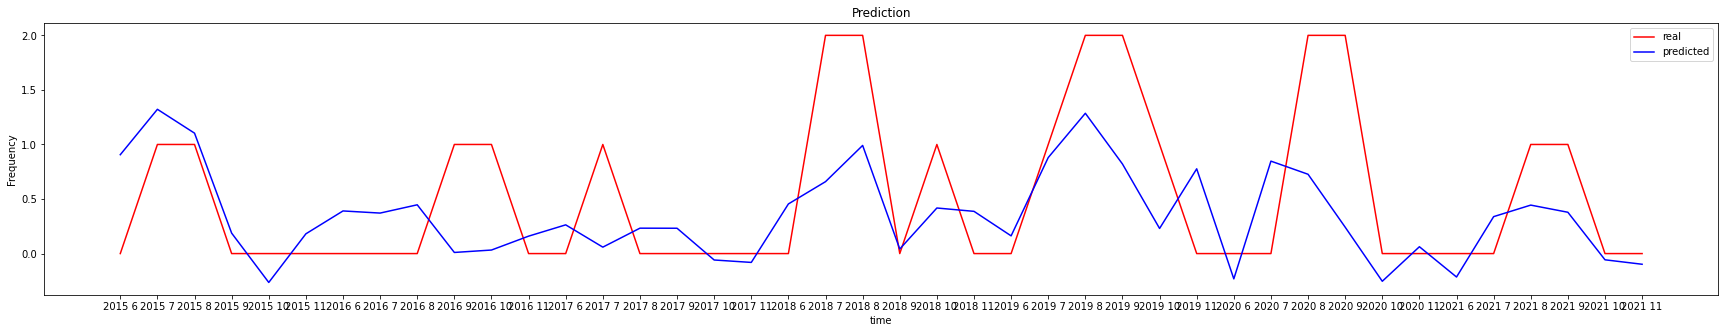

In [44]:
plt.figure(figsize=(30, 5))  

plt.plot(Y1, color='red', label='real')
plt.plot(lgb_train_pred, color='blue', label='predicted')
plt.title('Prediction')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

https://han-py.tistory.com/330
https://d2.naver.com/helloworld/0065813
https://romg2.github.io/mlguide/10_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-05.-%ED%9A%8C%EA%B7%80-%EC%8B%A4%EC%8A%B5/

#Modelling


In [45]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x.values, y2, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Scores : Base model

In [46]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 30.6443 (2.0763)



In [47]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 30.6434 (2.0764)



In [48]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 31.8428 (3.0925)



In [49]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 30.5727 (3.8422)



In [50]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 30.7470 (3.3424)



In [51]:
core = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 30.7470 (3.3424)



## Stacking averaged Models Class

In [52]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [53]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 29.5380 (2.5413)



In [54]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR))

score = rmsle_cv(averaged_models)
print("Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Averaged models score: 29.4312 (2.7621)


In [55]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [56]:
averaged_models.fit(x, y2)
av_train_pred = averaged_models.predict(X)
print(rmsle(Y2, av_train_pred))

30.84269631691149


In [57]:
model_xgb.fit(x, y2)
xgb_train_pred = model_xgb.predict(X)
print(rmsle(Y2, xgb_train_pred))

30.17159713577992


In [58]:
model_lgb.fit(x, y2)
lgb_train_pred = model_lgb.predict(X)
print(rmsle(Y2, lgb_train_pred))

31.235832902080663


In [ ]:
xgb_train_pred

In [60]:
#Y2 = Y2.values.tolist()

In [63]:
Y2 = Y2.set_index(test["Name"])
xgb_train_pred = pd.DataFrame(xgb_train_pred)
xgb_train_pred = xgb_train_pred.set_index(test["Name"])

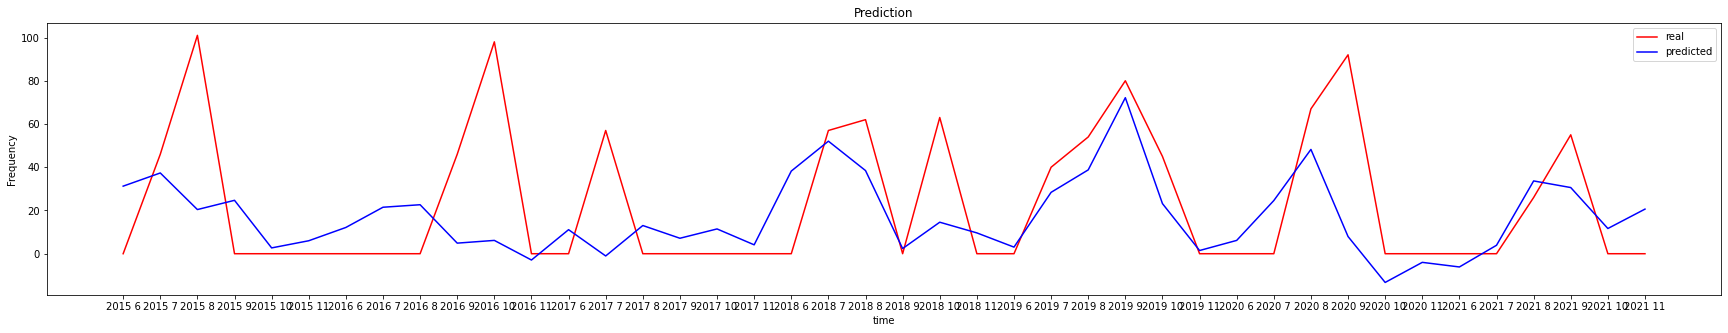

In [64]:
plt.figure(figsize=(30, 5))  
plt.plot(Y2, color='red', label='real')
plt.plot(xgb_train_pred, color='blue', label='predicted')
plt.title('Prediction')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.legend()
plt.show()